# PART A (i) Binary classifier

In [6]:
import tensorflow as tf
from sklearn import preprocessing
import pandas as pd
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Selecting indexes with labels 3 and 8 in traina nd test data
indexD1 = train_labels==3
indexD2 = train_labels==8
indexD3 = test_labels == 3
indexD4 = test_labels==8

allindices_train= indexD1 | indexD2
allindices_test = indexD3 | indexD4
train_images= train_images[allindices_train]
test_images= test_images[allindices_test]

train_labels= train_labels[allindices_train]
test_labels = test_labels[allindices_test]
n_samples= len(train_labels)

#Converting labels 3 to 0 and 8 to 1
Y_train = pd.DataFrame(train_labels)
Y_test = pd.DataFrame(test_labels)

Y_train[0] = Y_train[0].map({3: 0, 8: 1})
Y_test[0] = Y_test[0].map({3: 0, 8: 1})
train_label = Y_train.as_matrix()
test_label = Y_test.as_matrix()

# Reshape the label data so that it is a real column vector

# Reshape training dataset so that the features are flattened
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], -1).astype('float32')

# Normalize training data
train_images = train_images/255.0
test_images = test_images/255.0

train_label= train_label.reshape(1,-1)
test_label= test_label.reshape(1,-1)
train_images= train_images.T
test_images= test_images.T

print("\nAfter transpose Shape of train images and train labels:",train_images.shape, train_label.shape)
print("\nAfter transpose Shape of test images and test labels",test_images.shape, test_label.shape)


learning_rate= 0.01
num_Iterations = 1000
display_step= 100



# We will load our training and target labels into x and y respectively
x = tf.placeholder(tf.float32, [train_images.shape[0], None])
y_ = tf.placeholder(tf.float32, [1, None])
print("shape of x",x.shape)

# We need a coefficient for each of the features and a single bias value
w = tf.Variable(tf.random_normal([train_images.shape[0], 1], mean=0.0, stddev=0.05))
w_T= tf.transpose(w)
print("\n shape of transposed weights", w_T.shape)
b = tf.Variable([0.0])

# In the graph we will mutliplyeach training data by the weights and add bias
y_pred= tf.matmul(w_T, x) + b

# Pipe the results through the signmoidactiviationfunction. 
y_pred_sigmoid= tf.sigmoid(y_pred) 

# Calculate the cross entropy error for all training data 
x_entropy= tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_)

# Calculate the mean cross entropy error
loss = tf.reduce_mean(x_entropy)

# add gradient descent
train_step= tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Round the predictions by the logistical unit to either 1 or 0
predictions = tf.round(y_pred_sigmoid)

# tf.equal will return a boolean array: True if prediction correct, False otherwise
# tf.castconverts the resulting boolean array to a numerical array 
# 1 if True (correct prediction), 0 if False (incorrect prediction)
predictions_correct = tf.cast(tf.equal(predictions, y_), tf.float32)

# Finally, we just determine the mean value of predictions_correct
accuracy = tf.reduce_mean(predictions_correct)


# Start training
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    for i in range(num_Iterations):
        feed_train= {x: train_images, y_: train_label}
        sess.run(train_step, feed_dict=feed_train)               
        if i% display_step == 0:
          currentLoss, train_accuracy= sess.run([loss, accuracy], feed_train)
          print('Iteration: ', i,' Loss: ', currentLoss, ' Accuracy: ',train_accuracy)      
    feed_test= {x: test_images, y_: test_label}
    print('Test Accuracy: ', sess.run(accuracy, feed_test))
   
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.



After transpose Shape of train images and train labels: (784, 12000) (1, 12000)

After transpose Shape of test images and test labels (784, 2000) (1, 2000)
shape of x (784, ?)

 shape of transposed weights (1, 784)
Iteration:  0  Loss:  0.81769603  Accuracy:  0.30833334
Iteration:  100  Loss:  0.14344564  Accuracy:  0.9730833
Iteration:  200  Loss:  0.104107395  Accuracy:  0.97725
Iteration:  300  Loss:  0.08881283  Accuracy:  0.97875
Iteration:  400  Loss:  0.08038073  Accuracy:  0.9799167
Iteration:  500  Loss:  0.07494135  Accuracy:  0.9815
Iteration:  600  Loss:  0.07110017  Accuracy:  0.982
Iteration:  700  Loss:  0.068221845  Accuracy:  0.9828333
Iteration:  800  Loss:  0.06597222  Accuracy:  0.98333335
Iteration:  900  Loss:  0.06415746  Accuracy:  0.98366666
Test Accuracy:  0.9805


# PART A (ii) Multi-class classification

Data extracted and reshaped: 
(784, 60000) (10, 60000) (784, 10000) (10, 10000)
epoch= 0   current loss= 2.4212787   accuracy= 0.0377
epoch= 1   current loss= 2.3744516   accuracy= 0.0563
epoch= 2   current loss= 2.3332126   accuracy= 0.08141667
epoch= 3   current loss= 2.2970483   accuracy= 0.1093
epoch= 4   current loss= 2.2650964   accuracy= 0.13246667
epoch= 5   current loss= 2.2363865   accuracy= 0.1541
epoch= 6   current loss= 2.2101717   accuracy= 0.17466667
epoch= 7   current loss= 2.1859055   accuracy= 0.19478333
epoch= 8   current loss= 2.1632242   accuracy= 0.21291667
epoch= 9   current loss= 2.1418507   accuracy= 0.23116666
epoch= 10   current loss= 2.1215613   accuracy= 0.2492
epoch= 11   current loss= 2.102186   accuracy= 0.26523334
epoch= 12   current loss= 2.0835872   accuracy= 0.27993333
epoch= 13   current loss= 2.065653   accuracy= 0.29303333
epoch= 14   current loss= 2.0482862   accuracy= 0.30435
epoch= 15   current loss= 2.031427   accuracy= 0.31446666
epoch= 16   

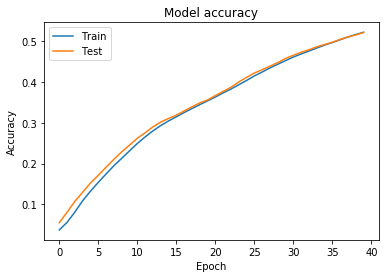

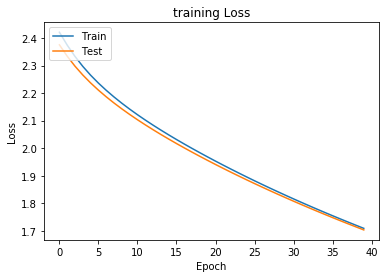

In [11]:
import tensorflow as tf 
import time
import matplotlib.pyplot as plt
import numpy as np
import time
import math

tf.reset_default_graph()


# Read in dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Reshape training dataset so that the features are flattened
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

# Normalize training data
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.T
X_test = X_test.T

# Convert labels to one-hot-encoded
number_of_classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, number_of_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, number_of_classes)

# Transpose train labels so that dimensions
# are number of classes * number of instances
Y_train = Y_train.T
Y_test = Y_test.T

print ("Data extracted and reshaped: ")
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    
# Model Parameters
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learningRate = 0.01
n_epochs = 40

    
# Placeholders for the traing and label data    
X = tf.placeholder(tf.float32, [n_inputs, None], name='image')    
y = tf.placeholder(tf.int32, [n_outputs, None], name='label')


# Create weight and bias matrices (variables) for each layer of our network

W1 = tf.get_variable("W1", [n_hidden1, n_inputs],initializer = tf.glorot_uniform_initializer(seed=1) )
b1 = tf.get_variable("b1", [n_hidden1, 1], initializer = tf.zeros_initializer())

W2 = tf.get_variable("W2", [n_hidden2, n_hidden1],initializer = tf.glorot_uniform_initializer(seed=1) )
b2 = tf.get_variable("b2", [n_hidden2, 1], initializer = tf.zeros_initializer())


W3 = tf.get_variable("W3", [n_outputs, n_hidden2], initializer = tf.glorot_uniform_initializer(seed=1))
b3 = tf.get_variable("b3", [n_outputs, 1], initializer = tf.zeros_initializer())


# Push feature data through first layer of NN
A1 = tf.add(tf.matmul(W1, X), b1)                      
H1  = tf.nn.relu(A1)

# Push feature data through second layer of NN
A2 = tf.add(tf.matmul(W2, H1), b2)                      
H2  = tf.nn.relu(A2)

# Calculate preactivation value for third layer
A3 = tf.add(tf.matmul(W3, H2), b3)

# Trnaspose the train and label data again to revert back to 
# shape number of instances * number of classes 
logits = tf.transpose(A3)
labels = tf.transpose(y)
    

# calculate the cross entropy error for each training example
error = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels)
loss = tf.reduce_mean(error)
    
# Point our gradient descent solver at the loss node
optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)


# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(A3), tf.argmax(y))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
#Running session
train_acc=[]
train_loss=[]
test_acc=[]
test_loss=[]
with tf.Session() as sess:
    Start_time = time.time()
   
    sess.run(tf.global_variables_initializer())  
    
    for epoch in range(n_epochs):
        _, currentLoss, acc  = sess.run([optimizer, loss, accuracy], feed_dict={X: X_train, y: Y_train})
        print ("epoch=",epoch, "  current loss=",currentLoss, "  accuracy=", acc)
        train_acc.append(acc)
        train_loss.append(currentLoss)
        test_acc.append(sess.run([accuracy], feed_dict={X: X_test, y: Y_test}))
        test_loss.append(sess.run([loss], feed_dict={X: X_test, y: Y_test}))
      
    stop_time = time.time()
    
    print ("Final Validation Accuracy ", sess.run(accuracy, feed_dict={X: X_test, y: Y_test}))
    print((stop_time-Start_time)/60,"mins")
        
    # Plot training & validation accuracy values
    plt.plot(train_acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.title('training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show() 
        
        

# PART A (iii)  Multi class Classification (mini-batch implementation)

Data extracted and reshaped: 
(784, 60000) (10, 60000) (784, 10000) (10, 10000)
epoch= 0   minibatch= 400   current loss= 0.7030735   accuracy= 0.765625
epoch= 0   minibatch= 800   current loss= 0.5742865   accuracy= 0.78125
epoch= 1   minibatch= 400   current loss= 0.57984316   accuracy= 0.765625
epoch= 1   minibatch= 800   current loss= 0.5244408   accuracy= 0.8125
epoch= 2   minibatch= 400   current loss= 0.5524897   accuracy= 0.765625
epoch= 2   minibatch= 800   current loss= 0.4980886   accuracy= 0.8125
epoch= 3   minibatch= 400   current loss= 0.53595465   accuracy= 0.765625
epoch= 3   minibatch= 800   current loss= 0.47776383   accuracy= 0.8125
epoch= 4   minibatch= 400   current loss= 0.5235256   accuracy= 0.796875
epoch= 4   minibatch= 800   current loss= 0.46368682   accuracy= 0.828125
epoch= 5   minibatch= 400   current loss= 0.50926805   accuracy= 0.796875
epoch= 5   minibatch= 800   current loss= 0.45249712   accuracy= 0.828125
epoch= 6   minibatch= 400   current loss= 0.4

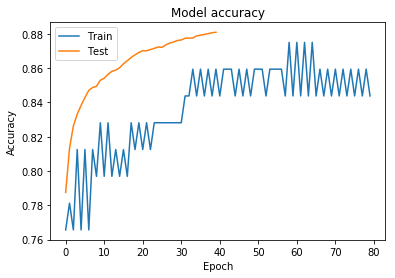

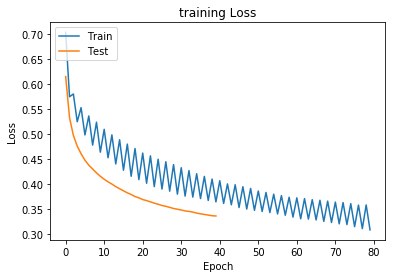

In [9]:
import tensorflow as tf 
import time
import matplotlib.pyplot as plt
import numpy as np
import time
import math

tf.reset_default_graph()


# Read in dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Reshape training dataset so that the features are flattened
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

# Normalize training data
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.T
X_test = X_test.T

# Convert labels to one-hot-encoded
number_of_classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, number_of_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, number_of_classes)

# Transpose train labels so that dimensions
# are number of classes * number of instances
Y_train = Y_train.T
Y_test = Y_test.T

print ("Data extracted and reshaped: ")
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    
# Model Parameters
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learningRate = 0.01
n_epochs = 40

    
# Placeholders for the traing and label data    
X = tf.placeholder(tf.float32, [n_inputs, None], name='image')    
y = tf.placeholder(tf.int32, [n_outputs, None], name='label')


# Create weight and bias matrices (variables) for each layer of our network

W1 = tf.get_variable("W1", [n_hidden1, n_inputs],initializer = tf.glorot_uniform_initializer(seed=1) )
b1 = tf.get_variable("b1", [n_hidden1, 1], initializer = tf.zeros_initializer())

W2 = tf.get_variable("W2", [n_hidden2, n_hidden1],initializer = tf.glorot_uniform_initializer(seed=1) )
b2 = tf.get_variable("b2", [n_hidden2, 1], initializer = tf.zeros_initializer())


W3 = tf.get_variable("W3", [n_outputs, n_hidden2], initializer = tf.glorot_uniform_initializer(seed=1))
b3 = tf.get_variable("b3", [n_outputs, 1], initializer = tf.zeros_initializer())


# Push feature data through first layer of NN
A1 = tf.add(tf.matmul(W1, X), b1)                      
H1  = tf.nn.relu(A1)

# Push feature data through second layer of NN
A2 = tf.add(tf.matmul(W2, H1), b2)                      
H2  = tf.nn.relu(A2)

# Calculate preactivation value for third layer
A3 = tf.add(tf.matmul(W3, H2), b3)

# Trnaspose the train and label data again to revert back to 
# shape number of instances * number of classes 
logits = tf.transpose(A3)
labels = tf.transpose(y)
    

# calculate the cross entropy error for each training example
error = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels)
loss = tf.reduce_mean(error)
    
# Point our gradient descent solver at the loss node
optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)


# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(A3), tf.argmax(y))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        


#Creates a list of random minibatches from (X, Y)
#Returns:mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
        
    np.random.seed(seed) # To make your "random" minibatches the same as ours
    m = X.shape[1]       # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### 
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### 
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size : ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches
    
  
mini_batches = random_mini_batches(X_train, Y_train)  


train_acc=[]
train_loss=[]
test_acc=[]
test_loss=[]
with tf.Session() as sess:
    Start_time = time.time()
   
    sess.run(tf.global_variables_initializer())  
    
    for epoch in range(n_epochs):
      minibatchNumber=0
      for miniBatch in mini_batches:
        minibatchNumber = minibatchNumber + 1
        _, currentLoss, acc  = sess.run([optimizer, loss, accuracy], feed_dict={X: miniBatch[0], y: miniBatch[1]})
        if minibatchNumber % 400 ==0 :
          train_acc.append(acc)
          train_loss.append(currentLoss)
          print ("epoch=",epoch, "  minibatch=",minibatchNumber, "  current loss=",currentLoss, "  accuracy=", acc)
    
      test_acc.append(sess.run([accuracy], feed_dict={X: X_test, y: Y_test}))
      test_loss.append(sess.run([loss], feed_dict={X: X_test, y: Y_test}))
    
    stop_time = time.time()
    
    print ("Final Validation Accuracy ", sess.run(accuracy, feed_dict={X: X_test, y: Y_test}))
    print((stop_time-Start_time)/60,"mins")
    
    # Plot training & validation accuracy values
    plt.plot(train_acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.title('training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show() 

      
